# DATA 620 Project 2
## Gabrielle Bartomeo, Zach Dravis, Peter Lombardo, and Hovig Ohannessian

Project 2:

1. We need to find a *large* data set to use. It can be baseball or something else. The data set needs two or more groups that do not have connections inside themselves. As in, if it were graphed, nodes from group A would have edges ONLY to group B's nodes, and nodes from group B would have edges ONLY to group A's nodes, but group A's nodes would NEVER have edges to group A, and group B's nodes would NEVER have edges to group B. Funny enough, what we did for Project 1 had a data set like this. And for our first group assignment. Remember, the data set we use MUST be large, it's specifically part of the project's requirements!

2. We need to reduce the size of that network somehow. The guidelines suggest using the island method in Chap 4 of our Social Network Analysis text.

3. We need to infer things about each of the groups based on what we've done and likely further analysis not mentioned, like z-testing or what have you.


*Step-by-step:*

1. Data set
-- LARGE!!!
-- Two or more groups
--- Each group may not connect to themselves
2. Decide on a question we want to answer
-- This should justify the data set we've picked
-- Will guide further steps
3. Reduce the network/data set in Python
-- Island Method (Chap 4 of Social Network Analysis)
-- Any other method(s) we can think of
4. Perform statistical analysis
-- Figure out which algorithms we need based off step 2
-- Graph what we can
5. Write up
-- Start with the analysis
--- This is because it will be fresh in our minds
--- What did we learn about each group?
---- How are the groups similar?
---- How are they different?
---- What does the above suggest about what we were looking to learn?
-- Explain each step taken during the coding process
--- What the functions do
--- Why we decided to use the functions and process we did
-- Explain each statistical method
--- Justify each method

## Abstract

We can always remove this part. This would just include a quick summary of what the data set was, what part we looked at, why we were looking at it, how we analyzed it, and what results we got. 6-10 sentences total.

## Objective

RideAustin is a non-profit rideshare located in Austin, TX. They made their data available to public since 2016 on data.world. Our goal is to breakdown these data and do a study on the number of rides affected by the weather and to identify trends between weather in Austin and Ride volumes. 

## Method

### The Data

The data we are looking into are from the years 2016-17, queried straight from data.world data hub since the data are very large.

### Data Setup

In [41]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import defaultdict

Explanation here for why we're using each of the above libraries.

In [42]:
data_folder = "https://query.data.world/s/{0}"
data_files = ["uvmgp6hbzytw2gt7yiwr4dbxzdakpj", "g47xbkg3i2el2xnkyrbimxpa7czljy", "y7wfzxx3xv6ko6g4ihr73ryrm3uq4u"]

Why are we making the `data_folder` and `data_files` variables? Explain here.

In [43]:
weather = pd.read_csv(data_folder.format(data_files[0]))

Why are we using `pandas`? Write that here

In [44]:
#weather.info # We remove this before we submit the project; just for glancing at the data for now!

In [45]:
rides_a = pd.read_csv(data_folder.format(data_files[1]))
rides_b = pd.read_csv(data_folder.format(data_files[2]))
rides = pd.concat([rides_a, rides_b, weather], axis=1, join='inner')

Reaffirm the previous text as to the usage of `pandas`.

In [46]:
#rides.info # We remove this before we submit the project; just for glancing at the data for now!

In [47]:
list(rides)

['RIDE_ID',
 'started_on',
 'created_date',
 'updated_date',
 'completed_on',
 'distance_travelled',
 'end_location_lat',
 'end_location_long',
 'driver_rating',
 'rider_rating',
 'active_driver_id',
 'charity_id',
 'requested_car_category',
 'free_credit_used',
 'surge_factor',
 'start_location_long',
 'start_location_lat',
 'rider_id',
 'round_up_amount',
 'promocode_redemption_id',
 'driver_reached_on',
 'RIDE_ID',
 'base_fare',
 'total_fare',
 'rate_per_mile',
 'rate_per_minute',
 'time_fare',
 'driver_accepted_on',
 'esimtated_time_arrive',
 'tipped_on',
 'tip',
 'driving_time_to_rider',
 'dispatch_location_lat',
 'dispatch_location_long',
 'driving_distance_to_rider',
 'dispatched_on',
 'status',
 'driver_id',
 'car_id',
 'color',
 'make',
 'model',
 'year',
 'car_categories_bitmask',
 'rating',
 'RIDE_ID',
 'HOURLYVISIBILITY',
 'HOURLYDRYBULBTEMPC',
 'HOURLYRelativeHumidity',
 'HOURLYWindSpeed',
 'HOURLYWindDirection',
 'HOURLYPrecip',
 'DAILYMaximumDryBulbTemp',
 'DAILYMinimumD

### Data Cleanup

Explain what needs to be cleaned and why. Then actually do it in codeblocks.

Isolate date from date time, convert to date type, and then index the month out of it.  Saving as a new column at each step.  Examine the head.

In [48]:
rides['started_on_date'] = pd.to_datetime(rides['started_on']).dt.date
rides['started_on_date'] = pd.to_datetime(rides['started_on_date'])
rides['started_on_month'] = rides['started_on_date'].dt.month
rides.head(5)

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed,started_on_date,started_on_month
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,NaN,NaN,NaN,529.0,1930.0,1.63,NaN,NaN,2016-06-04,6
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN,2016-06-04,6
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN,2016-06-04,6
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN,2016-06-04,6
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN,2016-06-04,6


In [49]:
rides.groupby('started_on_month')
rides.loc[:,"HOURLYDRYBULBTEMPC"].var()

rides.groupby(['started_on_month'])['HOURLYDRYBULBTEMPC'].agg(['var']) #This means we should filter down to only december

,var
started_on_month,
1,51.745390
2,36.160938
3,26.077065
4,18.620622
6,9.090395
7,12.757090
8,12.769961
9,15.763318
10,26.807124


In [50]:
rides = rides[rides['started_on_month'] == 12]

In [51]:
rides_by_temp = rides[rides["HOURLYDRYBULBTEMPC"].notnull()].copy()
rides_by_temp["HOURLYDRYBULBTEMPF"] = rides_by_temp["HOURLYDRYBULBTEMPC"].apply(lambda x: float(round(x * 9/5 + 32)))
rides_by_temp = rides_by_temp[["driver_id", "HOURLYDRYBULBTEMPF"]]
rides_by_temp.info

<bound method DataFrame.info of         driver_id  HOURLYDRYBULBTEMPF
500853       2031                42.0
500854       1208                42.0
500855       1225                42.0
500856       2344                42.0
500857       2291                42.0
500858       1364                42.0
500859        475                42.0
500860       1138                42.0
500861       1482                42.0
500862       1922                42.0
500863       1092                42.0
500864        482                42.0
500865       1237                42.0
500866        682                42.0
500867       2642                42.0
500868        827                42.0
500869        477                42.0
500870       2273                42.0
500871       1766                42.0
500872        294                42.0
500873        108                42.0
500874       1823                42.0
500875        699                42.0
500876        826                42.0
500877        875 

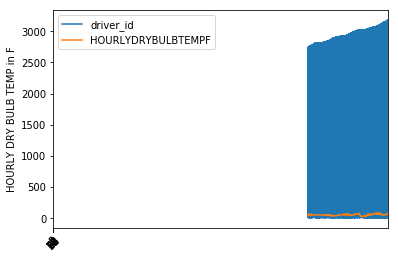

In [52]:
# this xticks arg labels the rides -> HOURLY DRY BULB TEMP C
rides_by_temp.plot(xticks=(range(2,78,7))) 
plt.xticks(rotation=45) 
plt.ylabel('HOURLY DRY BULB TEMP in F')
plt.show()
plt.close()

In [53]:
#The code was taking a while to run for making the graph and I wondered why. Here's the answer:

edges = rides_by_temp.apply(lambda x: (x["driver_id"], x["HOURLYDRYBULBTEMPF"]), axis=1)

print("Total nodes: %d" % (len(list(set(rides_by_temp["driver_id"].tolist() + rides_by_temp["HOURLYDRYBULBTEMPF"].tolist())))))
print("Total edges: %d" % (len(edges)))

Total nodes: 2305
Total edges: 157870


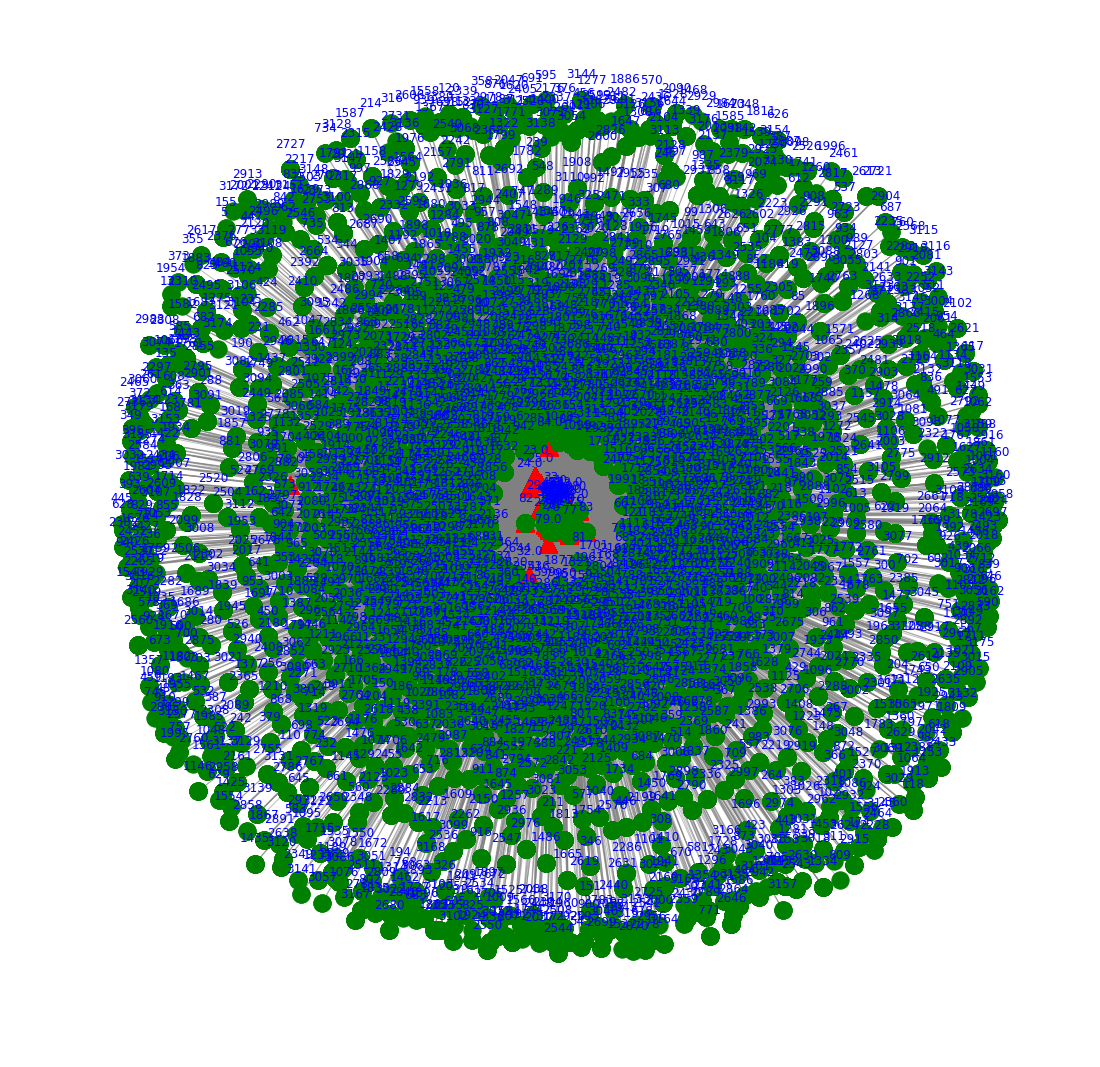

In [54]:
## DELETE ME AFTER, THIS IS JUST BEING NOSY ON THE DATA
G = nx.Graph()
G.add_nodes_from(list(set(rides_by_temp["driver_id"].tolist() + rides_by_temp["HOURLYDRYBULBTEMPF"].tolist())))
G.add_edges_from(rides_by_temp.apply(lambda x: (x["driver_id"], x["HOURLYDRYBULBTEMPF"]), axis=1))

#for node in G:
#    if type(node) == type(0.0):
#        G.node[node]["category"] = "temperature"
#    else:
#        G.node[node]["category"] = "driver"
pos = nx.spring_layout(G,k=.45)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+0.03)
plt.figure(figsize=(19,19))
nx.draw_networkx_labels(G, pos_labels, font_color='Blue')
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=rides_by_temp.HOURLYDRYBULBTEMPF.tolist(), node_color="r", node_shape="^", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=rides_by_temp.driver_id.tolist(), node_color="g", node_shape="o", node_size=300)
plt.axis('off')
plt.show()

### Resizing Data

Explain why we need to resize the data. If we're using the Island method, explain why. If we're using some other method, explain why. In general, explain why! Then do it in code blocks and in markdown blocks explain the process.

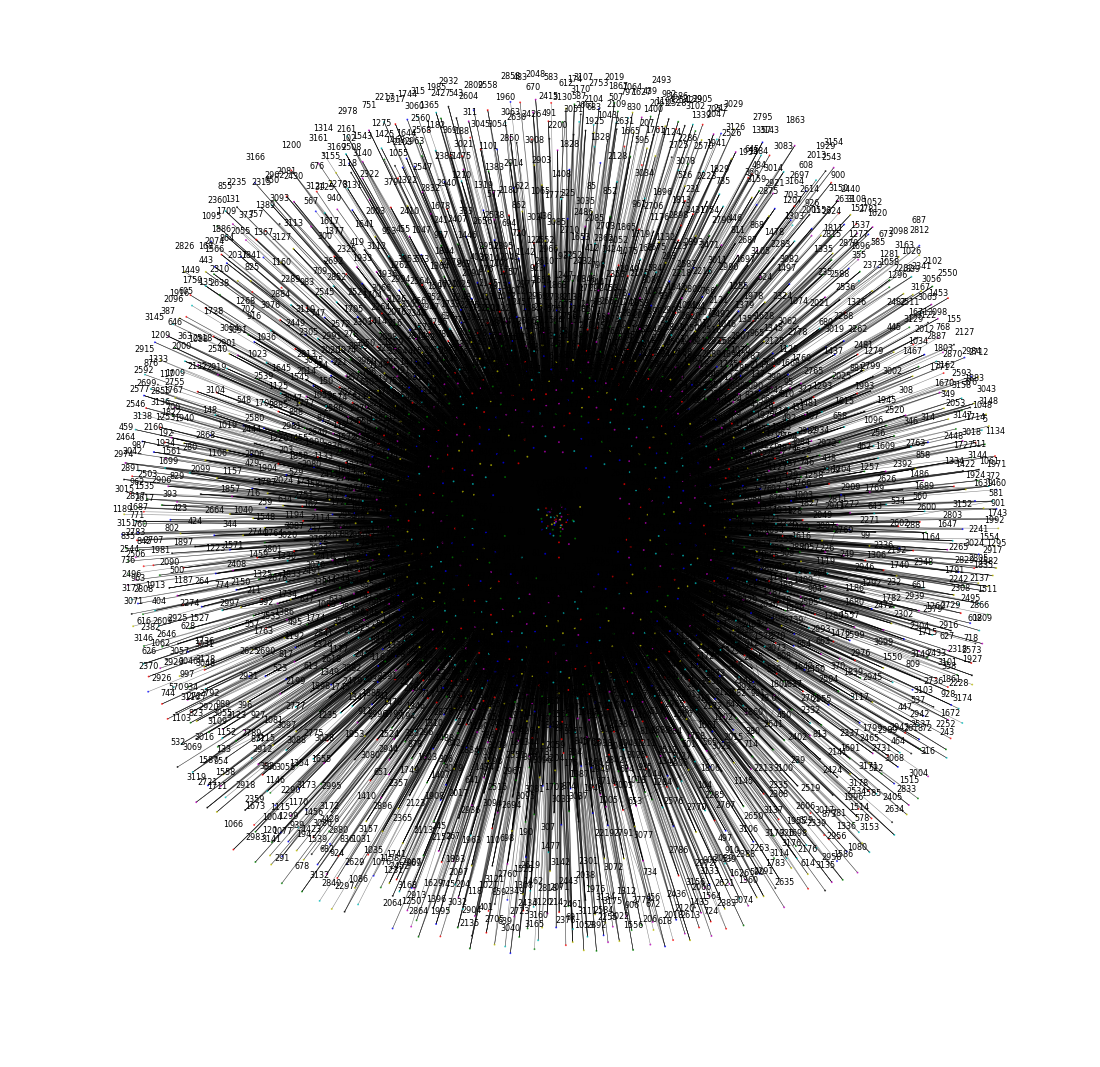

In [55]:
colors=['r','g','b','c','m','y','k']
colormap={}
pos = nx.spring_layout(G,k=.45)
pos_labels = {}
d=nx.degree(G)
keys = pos.keys()
nodesets=defaultdict(list)

i=0
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+0.03)
    ns=[d[n]/10000 for n in nodesets[key]]   
    colormap[key]=colors[i]
    i+=1
    ### wrap around the colormap if we run out of colors
    if i==len(colors):
        i=0  
plt.figure(figsize=(19,19))
nx.draw_networkx_nodes(G,pos,nodelist=nodesets, node_size=ns, 
                                node_color=colors, alpha=0.6)
nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.5)
nx.draw_networkx_labels(G,pos_labels,font_size=8)  
plt.axis('off')
plt.show()

In [56]:
######################################################################
def trim_edges(g, weight=1):
        g2=net.Graph()
        for (f, to, edata) in g.edges(data=True):
                if g[f][to]['weight'] > weight:
                        g2.add_edge(f,to,edata)
        return g2

In [57]:
def island_method(g, iterations=5):
    weights= [edata for (f,to,edata) in g.edges(data=True)]
    
    mn=min(weights)
    mx=max(weights)
    #compute the size of the step, so we get a reasonable step in iterations
    #step=((mx[0]-mn[0])/iterations, (mx[1]-mn[1])/iterations)
    print(weights)
    #print(mx)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]


In [ ]:
cc=nx.connected_component_subgraphs(G)[0]
#islands=island_method(cc)
#for i in islands:
# print the threshold level, size of the graph, and number of connected components
#   print(i[0], len(i[1]), len(nx.connected_component_subgraphs(i[1])))
    
##############################################################################

we're using some other method to resize the graph. The island method did not help us here with the `weight` in graph's edges. Trying to extract the weight from the edges showed that weight is not there. We had switched on resizing the `node_size` in the new graph above.

## Analysis

Yarr, here dere be code, graphs, an' statistics with a healthy dose of writin'!

Don't ask why I wrote it in pirate. We won't do the project in pirate. But if you're actually reading you'll notice this. Also, hi, how are you doing today?

## Inference

All text. Write a lot.

## Conclusion

6-8 sentences summing up our findings.